In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# техническое извлечение таблиц
df_spb = pd.read_csv('fixed_spb', sep=',')
df_moscow = pd.read_csv('fixed_moscow', sep=',')

df_spb.rename(columns={'Unnamed: 0': 'Дата'}, inplace=True)
df_spb.set_index('Дата', inplace=True)
df_spb.index = pd.to_datetime(df_spb.index)
df_moscow.rename(columns={'Unnamed: 0': 'Дата'}, inplace=True)
df_moscow.set_index('Дата', inplace=True)
df_moscow.index = pd.to_datetime(df_moscow.index)

In [3]:
# создадим новые переменные - идеи тут довольно очевидные

# перепад температур - показатель того, насколько климат резкий и переменчивый
df_spb['Перепад температур'] = df_spb['Дневная температура'] - df_spb['Ночная температура']
df_moscow['Перепад температур'] = df_moscow['Дневная температура'] - df_moscow['Ночная температура']

# альтернатива месяцу как категориальному признаку - время года; one hot encoding с ним будет давать меньшие матрицы
# но время года менее информативно и его легко вытащить из месяцев, так что пусть будет месяц 
df_spb['Месяц'] = df_spb.index.month
df_moscow['Месяц'] = df_moscow.index.month

In [4]:
# для построения круговой диаграммы
spb_conds_types = df_spb['Погодные явления'].value_counts().sort_index().index
spb_conds_vols = df_spb['Погодные явления'].value_counts().sort_index().values

moscow_conds_types = df_moscow['Погодные явления'].value_counts().sort_index().index
moscow_conds_vols = df_moscow['Погодные явления'].value_counts().sort_index().values

<function matplotlib.pyplot.show(close=None, block=None)>

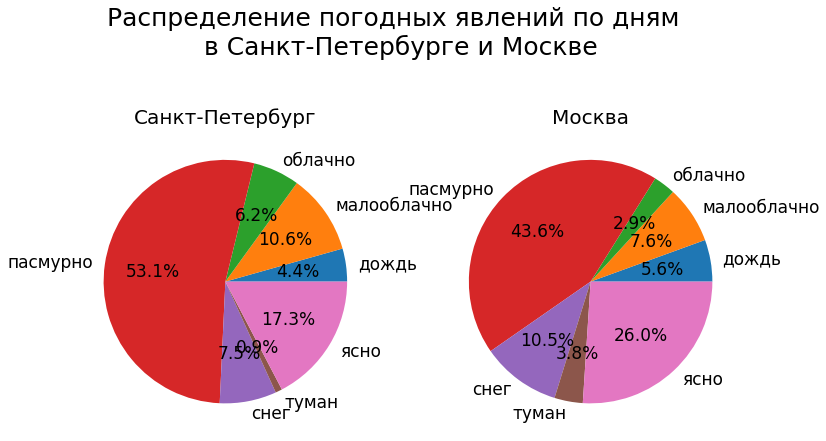

In [14]:
fig = plt.figure(1, figsize=(12, 8))
fig.suptitle("Распределение погодных явлений по дням \n в Санкт-Петербурге и Москве", fontsize=25)
ax1 = plt.subplot(1, 2, 1)
plt.pie(spb_conds_vols, labels=spb_conds_types, autopct='%.1f%%', textprops={'fontsize': 17})
ax1.set_title("Санкт-Петербург", fontdict={'fontsize': 20})
ax2 = plt.subplot(1, 2, 2)
ax2.set_title("Москва", fontdict={'fontsize': 20})
plt.pie(moscow_conds_vols, labels=moscow_conds_types, autopct='%.1f%%', textprops={'fontsize': 17})
plt.show

In [ ]:
# Питер явно более мрачный, чем Москва
# хотя переменная "дождь" здесь явна сломана (тот случай, когда хотелось бы видеть осадки в мм), вывод от этого не меняется

<function matplotlib.pyplot.show(close=None, block=None)>

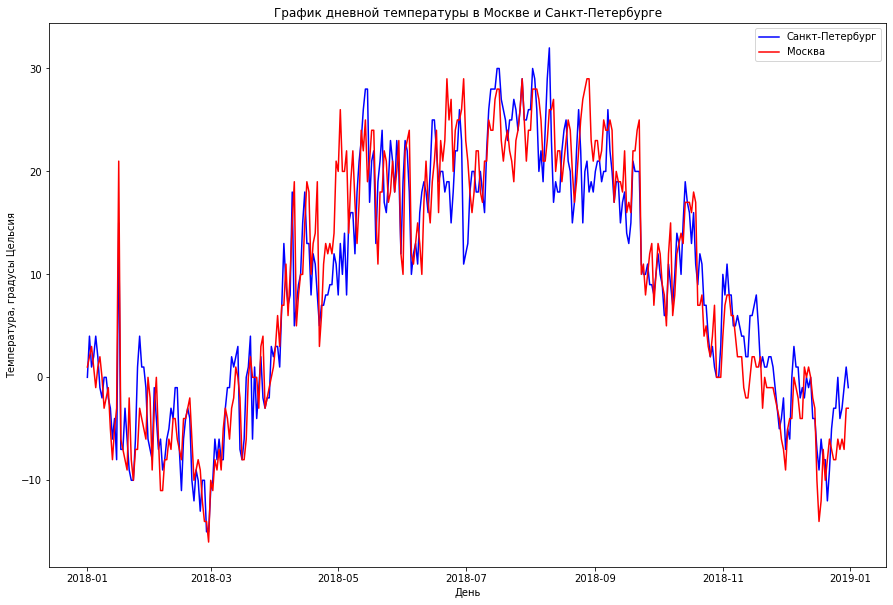

In [46]:
# посмотрим на динамику температуры в какой-нибудь из годов

fig = plt.figure(2, figsize=(15, 10))
ax1 = plt.plot(df_spb.loc['01-01-2018':'31-12-2018', 'Дневная температура'], color='b')
ax2 = plt.plot(df_moscow.loc['01-01-2018':'31-12-2018', 'Дневная температура'], color='r')
plt.title('График дневной температуры в Москве и Санкт-Петербурге')
plt.xlabel('День')
plt.ylabel('Температура, градусы Цельсия')
plt.legend(('Санкт-Петербург', 'Москва'))
plt.show

In [47]:
# очень странный выброс зимой; глянул на сайте, что это за дата - ошибка 404 
# то есть мой суперский цикл из предыдущего этапа, видимо, поставил туда такое стремное число 
# позже вернусь к этому и попробую что-то с этим придумать
# возможно, связано с тем, что пандас неоднозначно воспринимает даты типа 01-06 и 06-01;
# но тут все норм с датой, видимо все-таки кривой скрипт

# еще надо подумать над идеей более информативной визуализации, потому что здесь никаких особых выводов сделать не получится 
# что хочу сделать: иметь возможность считать усредненное значение по годам
# что еще можно придумать: построить график превышения температуры Москвы над СПб 
df_moscow.loc['01-01-2018':'31-01-2018', 'Дневная температура']

Дата
2018-01-01     1.0
2018-01-02     2.0
2018-01-03     3.0
2018-01-04     1.0
2018-01-05    -1.0
2018-01-06     1.0
2018-01-07     2.0
2018-01-08     0.0
2018-01-09    -3.0
2018-01-10    -2.0
2018-01-11    -1.0
2018-01-12    -5.0
2018-01-13    -8.0
2018-01-14    -5.0
2018-01-15    -3.0
2018-01-16    21.0
2018-01-17    -6.0
2018-01-18    -7.0
2018-01-19    -8.0
2018-01-20    -9.0
2018-01-21    -2.0
2018-01-22    -8.0
2018-01-23   -10.0
2018-01-24    -7.0
2018-01-25    -7.0
2018-01-26    -3.0
2018-01-27    -4.0
2018-01-28    -5.0
2018-01-29    -6.0
2018-01-30     0.0
2018-01-31    -2.0
Name: Дневная температура, dtype: float64

In [ ]:
# я собирался сделать розу ветров отсюда: https://hatarilabs.com/ih-en/how-to-make-a-wind-rose-with-python-tutorial
# и в целом еще построить аналогичных верхнему графиков с другими переменными с помощью seaborn
# но он дохнет с непонятной ошибкой, см. ниже 
# короче, work in progress

In [48]:
lmao = pd.DataFrame({'a': [1, 2, 3, 4, 5, 6, 7], 'b': [1, 4, 9, 16, 25, 36, 49]})
lmao

,a,b
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25
5,6,36
6,7,49


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

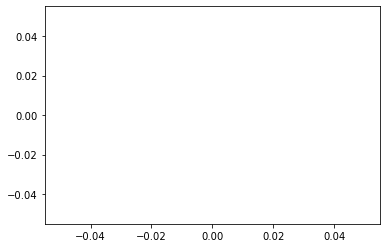

In [49]:
sns.lineplot(x=lmao.a.to_numpy(), y=lmao.b.to_numpy())